#**Importing Modules**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report
import tensorflow as tf
import seaborn as sns

#**Get files from drive** 

In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Getting Data File Nov 2003
d1 = drive.CreateFile({'id':"1r6WVCmX-bC-OMfuKYiO0zinVMqnqefhJ"})
d1.GetContentFile('Nov 2003.csv')

In [ ]:
# Getting Data File of Nov 2004
d2 = drive.CreateFile({'id':"1BEaJkaW9pwbhflTbrxMmmxpLAPryJi0j"})
d2.GetContentFile('Nov 2004.csv')

In [6]:
# Getting Data File of OCT 2003
d3 = drive.CreateFile({'id':"14qrxMXnZWjVdLIwipUR_-EHRZxccKsrH"})
d3.GetContentFile('Oct 2003.csv')

In [7]:
files.download('Oct 2003.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Data Pre-processing**

In [ ]:
# Reading Files and creating data frames
f1=pd.read_csv("Oct 2003.csv")
df1=pd.DataFrame(f1)
df1

,Unnamed: 0,Date,event,solAp,solKp,solf10p7Daily,time,tpaltitude,tplatitude,tplongitude,tpSolarZen,ktemp,density,O3_96,O3_127,ae_index,dst_index,sym_h,O3_density,col_den
0,0,26,1,10.0,2.3,243.4,998145,109.473373,12.064891,46.187244,126.984222,276.386414,1.723913e+12,1.481294e-06,--,56,-31,-30,2.553622e+06,1.516348e+10
1,1,26,1,10.0,2.3,243.4,998012,108.369583,12.062634,46.162155,127.008896,259.460693,2.083176e+12,1.481294e-06,--,56,-31,-30,3.085796e+06,1.516348e+10
2,2,26,1,10.0,2.3,243.4,997876,107.263870,12.060227,46.137043,127.033592,233.853317,2.654311e+12,1.414265e-06,--,56,-31,-30,3.753898e+06,1.516348e+10
3,3,26,1,10.0,2.3,243.4,997743,106.157074,12.057986,46.111958,127.058266,207.674591,3.493698e+12,9.907167e-07,--,56,-31,-30,3.461265e+06,1.516348e+10
4,4,26,1,10.0,2.3,243.4,997607,105.049255,12.055567,46.086845,127.082954,187.036041,4.628376e+12,1.223286e-06,--,56,-31,-30,5.661828e+06,1.516348e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601267,601295,31,98,116.0,4.3,248.9,87674469,74.702950,9.541140,25.907038,145.163940,207.508942,7.681364e+14,7.164987e-07,--,609,-69,-73,5.503687e+08,1.780777e+10
601268,601296,31,98,116.0,4.3,248.9,87674600,73.563889,9.553928,25.884565,145.187637,206.174927,9.287091e+14,1.033010e-06,--,609,-69,-73,9.593660e+08,1.780777e+10
601269,601297,31,98,116.0,4.3,248.9,87674738,72.423851,9.567107,25.862158,145.211319,209.336380,1.098005e+15,1.149698e-06,--,609,-69,-73,1.262374e+09,1.780777e+10
601270,601298,31,98,116.0,4.3,248.9,87674867,71.282799,9.579803,25.839666,145.235016,211.722443,1.299769e+15,1.169214e-06,--,609,-69,-73,1.519708e+09,1.780777e+10


In [ ]:
# Reading Files and creating data frames
f2=pd.read_csv("Nov 2003.csv")
df2=pd.DataFrame(f2)
df2

,Unnamed: 0,Date,event,solAp,solKp,solf10p7Daily,time,tpaltitude,tplatitude,tplongitude,tpSolarZen,ktemp,density,O3_96,O3_127,ae_index,dst_index,sym_h,O3_density,col_den
0,0,1,1,26.0,5.0,210.4,1320342,109.312874,11.928361,27.051359,144.264923,289.247742,2.024306e+12,8.934129e-07,--,607,-69,-74,1.808541e+06,1.921766e+10
1,1,1,1,26.0,5.0,210.4,1320210,108.209297,11.926141,27.026283,144.289459,281.309357,2.344630e+12,7.709245e-07,--,607,-69,-74,1.807533e+06,1.921766e+10
2,2,1,1,26.0,5.0,210.4,1320075,107.104729,11.923806,27.001190,144.314011,272.173126,2.741623e+12,7.041723e-07,--,607,-69,-74,1.930575e+06,1.921766e+10
3,3,1,1,26.0,5.0,210.4,1319941,105.998711,11.921523,26.976105,144.338547,263.150696,3.223496e+12,7.390482e-07,--,609,-69,-73,2.382319e+06,1.921766e+10
4,4,1,1,26.0,5.0,210.4,1319805,104.891106,11.919088,26.950996,144.363098,247.562057,3.922112e+12,7.693852e-07,--,609,-69,-73,3.017615e+06,1.921766e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869668,2869675,30,98,12.0,3.0,152.8,89212092,75.111053,-1.790957,335.059235,154.397354,194.799866,8.174919e+14,8.063189e-07,--,347,-26,-33,6.591591e+08,1.226737e+10
2869669,2869676,30,98,12.0,3.0,152.8,89212243,73.973129,-1.789488,335.084076,154.408600,201.850632,9.546477e+14,8.691362e-07,--,347,-26,-33,8.297189e+08,1.226737e+10
2869670,2869677,30,98,12.0,3.0,152.8,89212395,72.834251,-1.788010,335.108948,154.419815,206.139069,1.125344e+15,9.823987e-07,--,347,-26,-33,1.105536e+09,1.226737e+10
2869671,2869678,30,98,12.0,3.0,152.8,89212521,71.694588,-1.787928,335.133484,154.429581,207.810104,1.340520e+15,1.248143e-06,--,347,-26,-33,1.673162e+09,1.226737e+10


In [ ]:
# Reading Files and creating data frames
f3=pd.read_csv("Nov 2004.csv")
df3=pd.DataFrame(f3)
df3

,Unnamed: 0,Date,event,solAp,solKp,solf10p7Daily,time,tpaltitude,tplatitude,tplongitude,tpSolarZen,ktemp,density,O3_96,O3_127,ae_index,dst_index,sym_h,O3_density,col_den
0,0,1,1,12,2.7,139.2,3078387,109.423233,14.263371,19.487509,144.744781,276.894592,2.299960e+12,1.630000e-07,--,310,-19,-9,3.748935e+05,1.953871e+10
1,1,1,1,12,2.7,139.2,3078253,108.320251,14.260718,19.462215,144.769547,281.274963,2.555530e+12,1.630000e-07,--,310,-19,-9,4.165514e+05,1.953871e+10
2,2,1,1,12,2.7,139.2,3078119,107.216278,14.258057,19.436920,144.794327,279.596130,2.901220e+12,1.630000e-07,--,310,-19,-9,4.728989e+05,1.953871e+10
3,3,1,1,12,2.7,139.2,3077987,106.111176,14.255451,19.411634,144.819092,275.584045,3.328930e+12,1.630000e-07,--,310,-19,-9,5.426156e+05,1.953871e+10
4,4,1,1,12,2.7,139.2,3077851,105.004166,14.252700,19.386330,144.843872,275.164887,3.777170e+12,1.630000e-07,--,310,-19,-9,6.156787e+05,1.953871e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017503,3017503,30,96,17,4.0,111.4,90231670,75.405930,-3.691292,329.487701,152.170960,211.435822,6.621610e+14,2.920000e-07,--,113,-5,-6,1.933510e+08,8.241677e+09
3017504,3017504,30,96,17,4.0,111.4,90231830,74.268173,-3.689023,329.512665,152.183365,214.712189,7.787660e+14,3.990000e-07,--,113,-5,-6,3.107276e+08,8.241677e+09
3017505,3017505,30,96,17,4.0,111.4,90231976,73.129532,-3.687521,329.537445,152.194946,213.038940,9.364770e+14,6.240000e-07,--,113,-5,-6,5.843616e+08,8.241677e+09
3017506,3017506,30,96,17,4.0,111.4,90232062,71.989670,-3.689300,329.561585,152.203140,204.414856,1.170340e+15,1.010000e-06,--,113,-5,-6,1.182043e+09,8.241677e+09


In [ ]:
# Merging Nov 2003 & Nov 2004 datasets
df =  pd.concat([df1,df2,df3])
df

,Unnamed: 0,Date,event,solAp,solKp,solf10p7Daily,time,tpaltitude,tplatitude,tplongitude,tpSolarZen,ktemp,density,O3_96,O3_127,ae_index,dst_index,sym_h,O3_density,col_den
0,0,26,1,10.0,2.3,243.4,998145,109.473373,12.064891,46.187244,126.984222,276.386414,1.723913e+12,1.481294e-06,--,56,-31,-30,2.553622e+06,1.516348e+10
1,1,26,1,10.0,2.3,243.4,998012,108.369583,12.062634,46.162155,127.008896,259.460693,2.083176e+12,1.481294e-06,--,56,-31,-30,3.085796e+06,1.516348e+10
2,2,26,1,10.0,2.3,243.4,997876,107.263870,12.060227,46.137043,127.033592,233.853317,2.654311e+12,1.414265e-06,--,56,-31,-30,3.753898e+06,1.516348e+10
3,3,26,1,10.0,2.3,243.4,997743,106.157074,12.057986,46.111958,127.058266,207.674591,3.493698e+12,9.907167e-07,--,56,-31,-30,3.461265e+06,1.516348e+10
4,4,26,1,10.0,2.3,243.4,997607,105.049255,12.055567,46.086845,127.082954,187.036041,4.628376e+12,1.223286e-06,--,56,-31,-30,5.661828e+06,1.516348e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017503,3017503,30,96,17.0,4.0,111.4,90231670,75.405930,-3.691292,329.487701,152.170960,211.435822,6.621610e+14,2.920000e-07,--,113,-5,-6,1.933510e+08,8.241677e+09
3017504,3017504,30,96,17.0,4.0,111.4,90231830,74.268173,-3.689023,329.512665,152.183365,214.712189,7.787660e+14,3.990000e-07,--,113,-5,-6,3.107276e+08,8.241677e+09
3017505,3017505,30,96,17.0,4.0,111.4,90231976,73.129532,-3.687521,329.537445,152.194946,213.038940,9.364770e+14,6.240000e-07,--,113,-5,-6,5.843616e+08,8.241677e+09
3017506,3017506,30,96,17.0,4.0,111.4,90232062,71.989670,-3.689300,329.561585,152.203140,204.414856,1.170340e+15,1.010000e-06,--,113,-5,-6,1.182043e+09,8.241677e+09


In [ ]:
x_col=["Date","event","solAp","solKp","solf10p7Daily","time","tpaltitude","tplatitude","tplongitude","tpSolarZen","ktemp","ae_index","dst_index","sym_h"]  # "sym_h" , "solKp"

In [ ]:
x=pd.DataFrame(columns=x_col)
for i in x_col:
  x[i]=df[i]
x

,Date,event,solAp,solKp,solf10p7Daily,time,tpaltitude,tplatitude,tplongitude,tpSolarZen,ktemp,ae_index,dst_index,sym_h
0,26,1,10.0,2.3,243.4,998145,109.473373,12.064891,46.187244,126.984222,276.386414,56,-31,-30
1,26,1,10.0,2.3,243.4,998012,108.369583,12.062634,46.162155,127.008896,259.460693,56,-31,-30
2,26,1,10.0,2.3,243.4,997876,107.263870,12.060227,46.137043,127.033592,233.853317,56,-31,-30
3,26,1,10.0,2.3,243.4,997743,106.157074,12.057986,46.111958,127.058266,207.674591,56,-31,-30
4,26,1,10.0,2.3,243.4,997607,105.049255,12.055567,46.086845,127.082954,187.036041,56,-31,-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017503,30,96,17.0,4.0,111.4,90231670,75.405930,-3.691292,329.487701,152.170960,211.435822,113,-5,-6
3017504,30,96,17.0,4.0,111.4,90231830,74.268173,-3.689023,329.512665,152.183365,214.712189,113,-5,-6
3017505,30,96,17.0,4.0,111.4,90231976,73.129532,-3.687521,329.537445,152.194946,213.038940,113,-5,-6
3017506,30,96,17.0,4.0,111.4,90232062,71.989670,-3.689300,329.561585,152.203140,204.414856,113,-5,-6


In [ ]:
y_col=["O3_density"]
y=pd.DataFrame(columns=y_col)
for i in y_col:
  y[i]=df[i]

In [ ]:
# Random Train Test Split
x_train, x_test, x_train, x_test = train_test_split(x, x, test_size = 0.1, random_state = 0)

In [ ]:
# Data Scaling
'''
# Standard Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()
'''

# Min-Max Scaling
sc_x = MinMaxScaler()
sc_y = MinMaxScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(5839607, 14)
(648846, 14)


#**Model Building and Training**

In [ ]:
# Parameters

# Neurons
neu_in = 14
neu_out = neu_in
neu_1 = 12
neu_2 = 10
neu_3 = 8
neu_bn = 6
activ = tf.keras.layers.LeakyReLU()
dfr=0.1       # Droput fracton
bsz=16        # Batch Size
epc=10        # Epochs
lss="mse"     # Loss function
vld_splt=0.11 # Validation Split
#  Evaluation Matrix
mtx= [tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsolutePercentageError()]

In [ ]:
# define encoder
visible = Input(shape=(neu_in,))

# encoder level 1
enc = Dense(neu_1,activation=activ)(visible)
enc = BatchNormalization()(enc)
enc = Dropout(dfr)(enc)
# encoder level 2
enc = Dense(neu_2,activation=activ)(enc)
enc = BatchNormalization()(enc)
enc = Dropout(dfr)(enc)
# encoder level 3
enc = Dense(neu_3,activation=activ)(enc)
enc = BatchNormalization()(enc)
enc = Dropout(dfr)(enc)

# bottleneck
bottleneck = Dense(neu_bn,activation=activ)(enc)

# define decoder, level 1
dec = Dense(neu_3,activation=activ)(bottleneck)
dec = BatchNormalization()(dec)
dec = Dropout(dfr)(dec)
# decoder level 2
dec = Dense(neu_2,activation=activ)(dec)
dec = BatchNormalization()(dec)
dec = Dropout(dfr)(dec)
# decoder level 3
dec = Dense(neu_1,activation=activ)(dec)
dec = BatchNormalization()(dec)
dec = Dropout(dfr)(dec)

# output layer
output = Dense(neu_out, activation='sigmoid')(dec)

**AutoEncoder model**

In [ ]:
# define AutoEncoder model
AutoEncoder = Model(inputs=visible, outputs=output)

In [ ]:
# Compiling the AutoEncoder model
AutoEncoder.compile(optimizer = 'adam', loss = lss, metrics = mtx)

In [ ]:
# Training the AutoEncoder model
res = AutoEncoder.fit(x_train, x_train,validation_data=(x_test,x_test),validation_split=vld_splt,batch_size = bsz, epochs = epc)

Epoch 1/10
324829/324829 [==============================] - 827s 3ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0568 - root_mean_squared_error: 0.0803 - mean_absolute_percentage_error: 720941.1875 - val_loss: 0.0030 - val_mean_squared_error: 0.0030 - val_mean_absolute_error: 0.0360 - val_root_mean_squared_error: 0.0543 - val_mean_absolute_percentage_error: 530134.8750
Epoch 2/10
324829/324829 [==============================] - 836s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - mean_absolute_error: 0.0542 - root_mean_squared_error: 0.0763 - mean_absolute_percentage_error: 700632.0625 - val_loss: 0.0029 - val_mean_squared_error: 0.0029 - val_mean_absolute_error: 0.0353 - val_root_mean_squared_error: 0.0541 - val_mean_absolute_percentage_error: 573043.1250
Epoch 3/10
324829/324829 [==============================] - 869s 3ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - mean_absolute_error: 0.0534 - root_mean_squared_error: 0.0756 - mean_absolut

**Encoder Model**

In [ ]:
# define an Encoder model (without the decoder)
Encoder = Model(inputs=visible, outputs=bottleneck)

#**Model Saving**

In [ ]:
# save the Encoder to file
AutoEncoder.save('AutoEncoder_4.h5')
AutoEncoder.summary()
#plot_model(Encoder, 'Encoder_compress.png', show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense (Dense)                (None, 12)                180       
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
tf.identity (TFOpLambda)     (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
tf.identity_1 (TFOpLambda)   (None, 10)                0     

In [ ]:
# save the Encoder to file
Encoder.save('Encoder_4.h5')
Encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense (Dense)                (None, 12)                180       
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
tf.identity (TFOpLambda)     (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
tf.identity_1 (TFOpLambda)   (None, 10)                0   

In [ ]:
# Training History
res.history

{'loss': [0.006448506377637386,
  0.005825050640851259,
  0.005708983168005943,
  0.005671750288456678,
  0.00565310288220644,
  0.005614972207695246,
  0.005604417994618416,
  0.005602743476629257,
  0.005606255028396845,
  0.005597274750471115],
 'mean_absolute_error': [0.05675670877099037,
  0.0541931688785553,
  0.05340082570910454,
  0.05306448042392731,
  0.05296408385038376,
  0.05286512151360512,
  0.05283752828836441,
  0.05283963307738304,
  0.05285579338669777,
  0.05282571166753769],
 'mean_absolute_percentage_error': [720941.1875,
  700632.0625,
  719009.625,
  717345.5625,
  711152.8125,
  716491.4375,
  713640.5,
  712644.3125,
  713293.75,
  712935.5625],
 'mean_squared_error': [0.006448506377637386,
  0.005825050640851259,
  0.005708983168005943,
  0.005671750288456678,
  0.00565310288220644,
  0.005614972207695246,
  0.005604417994618416,
  0.005602743476629257,
  0.005606255028396845,
  0.005597274750471115],
 'root_mean_squared_error': [0.08030225336551666,
  0.0763

# **Plots**

In [ ]:
res.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_root_mean_squared_error', 'val_mean_absolute_percentage_error'])

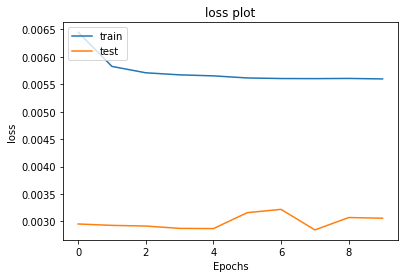

In [ ]:
Lt=[]
Lv=[]
for i in res.history['loss']:
  Lt.append(i)
for i in res.history['val_loss']:
  Lv.append(i)
plt.plot(Lt)
plt.plot(Lv)
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

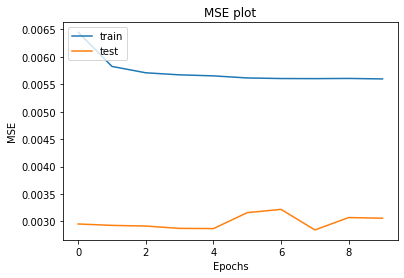

In [ ]:
Lt=[]
Lv=[]
for i in res.history['mean_squared_error']:
  Lt.append(i)
for i in res.history['val_mean_squared_error']:
  Lv.append(i)
plt.plot(Lt)
plt.plot(Lv)
plt.title('MSE plot')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

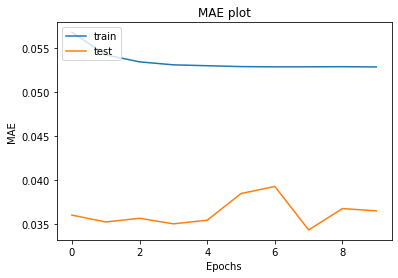

In [ ]:
Lt=[]
Lv=[]
for i in res.history['mean_absolute_error']:
  Lt.append(i)
for i in res.history['val_mean_absolute_error']:
  Lv.append(i)
plt.plot(Lt)
plt.plot(Lv)
plt.title('MAE plot')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

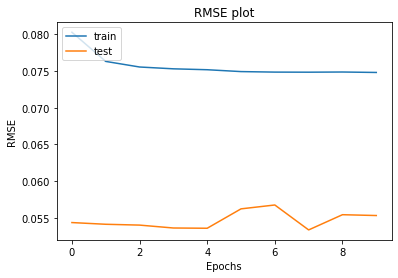

In [ ]:
Lt=[]
Lv=[]
for i in res.history['root_mean_squared_error']:
  Lt.append(i)
for i in res.history['val_root_mean_squared_error']:
  Lv.append(i)
plt.plot(Lt)
plt.plot(Lv)
plt.title('RMSE plot')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

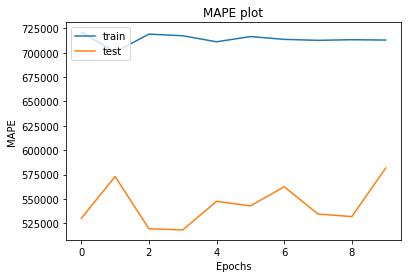

In [ ]:
Lt=[]
Lv=[]
for i in res.history['mean_absolute_percentage_error']:
  Lt.append(i)
for i in res.history['val_mean_absolute_percentage_error']:
  Lv.append(i)
plt.plot(Lt)
plt.plot(Lv)
plt.title('MAPE plot')
plt.ylabel('MAPE')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

# **Correlation between features**

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'event', 'solAp', 'solKp', 'solf10p7Daily',
       'time', 'tpaltitude', 'tplatitude', 'tplongitude', 'tpSolarZen',
       'ktemp', 'density', 'O3_96', 'O3_127', 'ae_index', 'dst_index', 'sym_h',
       'O3_density', 'col_den'],
      dtype='object')

In [ ]:
df = df.drop(["Unnamed: 0","density","O3_96","O3_127","col_den"],axis = 1)
df

,Date,event,solAp,solKp,solf10p7Daily,time,tpaltitude,tplatitude,tplongitude,tpSolarZen,ktemp,ae_index,dst_index,sym_h,O3_density
0,26,1,10.0,2.3,243.4,998145,109.473373,12.064891,46.187244,126.984222,276.386414,56,-31,-30,2.553622e+06
1,26,1,10.0,2.3,243.4,998012,108.369583,12.062634,46.162155,127.008896,259.460693,56,-31,-30,3.085796e+06
2,26,1,10.0,2.3,243.4,997876,107.263870,12.060227,46.137043,127.033592,233.853317,56,-31,-30,3.753898e+06
3,26,1,10.0,2.3,243.4,997743,106.157074,12.057986,46.111958,127.058266,207.674591,56,-31,-30,3.461265e+06
4,26,1,10.0,2.3,243.4,997607,105.049255,12.055567,46.086845,127.082954,187.036041,56,-31,-30,5.661828e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017503,30,96,17.0,4.0,111.4,90231670,75.405930,-3.691292,329.487701,152.170960,211.435822,113,-5,-6,1.933510e+08
3017504,30,96,17.0,4.0,111.4,90231830,74.268173,-3.689023,329.512665,152.183365,214.712189,113,-5,-6,3.107276e+08
3017505,30,96,17.0,4.0,111.4,90231976,73.129532,-3.687521,329.537445,152.194946,213.038940,113,-5,-6,5.843616e+08
3017506,30,96,17.0,4.0,111.4,90232062,71.989670,-3.689300,329.561585,152.203140,204.414856,113,-5,-6,1.182043e+09


In [ ]:
L=[]
for col1 in df.columns:
    l=[]
    for col2 in df.columns:
        c=df[f"{col1}"].corr(df[f"{col2}"])
        l.append(c)
    L.append(l)

In [ ]:
df_cor=pd.DataFrame(L,index=df.columns,columns=df.columns)
df_cor

,Date,event,solAp,solKp,solf10p7Daily,time,tpaltitude,tplatitude,tplongitude,tpSolarZen,ktemp,ae_index,dst_index,sym_h,O3_density
Date,1.000000,-0.003274,0.109240,0.067869,0.347195,-0.001193,0.000502,-0.121794,-0.004930,-0.074727,0.018729,0.006196,-0.106687,-0.125780,-0.035341
event,-0.003274,1.000000,0.001393,0.000700,-0.000844,0.066245,-0.001618,-0.746938,0.001792,-0.189617,-0.037595,0.000735,-0.001440,0.002634,-0.022694
solAp,0.109240,0.001393,1.000000,0.764924,0.370312,-0.002337,-0.000370,0.052463,0.000800,0.034495,0.055089,0.538080,-0.666022,-0.647723,-0.003232
solKp,0.067869,0.000700,0.764924,1.000000,0.241094,0.020660,-0.000120,0.036332,-0.001867,0.019305,0.051988,0.595992,-0.572580,-0.555277,-0.010884
solf10p7Daily,0.347195,-0.000844,0.370312,0.241094,1.000000,-0.000260,-0.000368,0.006477,-0.000860,0.063241,0.018639,0.157964,-0.269223,-0.290764,0.024154
time,-0.001193,0.066245,-0.002337,0.020660,-0.000260,1.000000,0.000114,-0.056139,-0.142384,-0.015138,0.003288,0.060817,-0.000183,0.004465,-0.002681
tpaltitude,0.000502,-0.001618,-0.000370,-0.000120,-0.000368,0.000114,1.000000,0.002329,0.000190,-0.001335,0.222604,-0.000059,0.000189,0.000179,-0.489952
tplatitude,-0.121794,-0.746938,0.052463,0.036332,0.006477,-0.056139,0.002329,1.000000,0.000322,0.271029,0.065646,0.036569,-0.031704,-0.036867,0.073187
tplongitude,-0.004930,0.001792,0.000800,-0.001867,-0.000860,-0.142384,0.000190,0.000322,1.000000,0.006286,-0.000750,-0.038974,-0.018144,-0.013474,0.000994
tpSolarZen,-0.074727,-0.189617,0.034495,0.019305,0.063241,-0.015138,-0.001335,0.271029,0.006286,1.000000,0.013682,0.023370,-0.002948,-0.009146,0.296868


In [ ]:
arr=np.array(L)

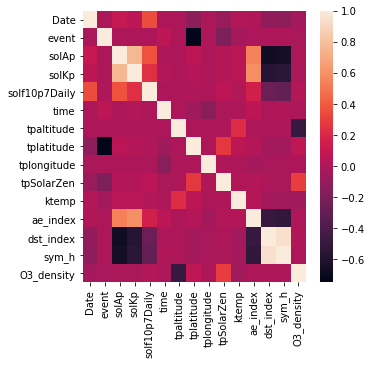

In [ ]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(arr, vmax = 1, square = False,xticklabels=df_cor.columns, yticklabels=df_cor.columns)
plt.show()

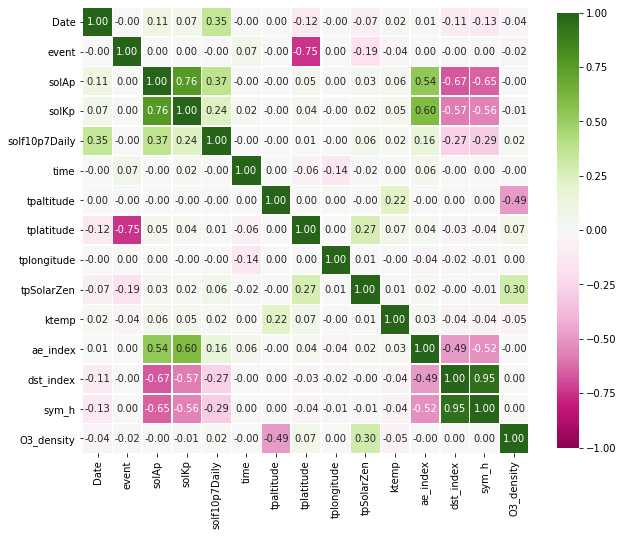

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(arr,vmin=-1.0, vmax=1.0,cmap="PiYG", center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": 0.80},xticklabels=df_cor.columns, yticklabels=df_cor.columns)
plt.show();

#**Correlation Between AutoEncoder Features**

In [ ]:
# encode the train & test data
x = sc_x.transform(x)
x_encoded = AutoEncoder.predict(x)

In [ ]:
print("x_encoded:\n",x_encoded)

x_encoded:
 [[0.9795631  0.07535809 0.07905832 ... 0.06590846 0.85758424 0.8257959 ]
 [0.9795083  0.07458022 0.07899091 ... 0.06586307 0.85757875 0.8257632 ]
 [0.9794401  0.07343754 0.07891071 ... 0.06580481 0.85756445 0.8257233 ]
 ...
 [0.7886907  0.97276306 0.04275128 ... 0.04795906 0.82636416 0.80029464]
 [0.7888719  0.97289485 0.04268524 ... 0.04785231 0.8263756  0.80016696]
 [0.78902763 0.97300845 0.04262656 ... 0.04775274 0.8263854  0.8000419 ]]


In [ ]:
print(x.shape)
print(x_encoded.shape)
print(df.shape)

(6488453, 14)
(6488453, 14)
(6488453, 15)


In [ ]:
x_encoded = pd.DataFrame(x_encoded)

In [ ]:
L=[]
for col1 in x_encoded.columns:
    l=[]
    for col2 in x_encoded.columns:
        c=x_encoded[col1].corr(x_encoded[col2])
        l.append(c)
    L.append(l)

In [ ]:
df_cor=pd.DataFrame(L)
df_cor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.021611,0.136208,0.055711,0.443738,-0.002361,-0.007681,-0.082637,-0.008730,-0.087702,0.063440,-0.023015,-0.102999,-0.115508
1,-0.021611,1.000000,-0.019088,-0.026319,0.019931,0.048222,0.007070,-0.772313,0.017022,-0.141870,-0.068428,0.017952,-0.010097,-0.047648
2,0.136208,-0.019088,1.000000,0.901204,0.421885,0.000838,-0.002608,0.062028,-0.004609,0.044866,0.215367,0.899342,-0.968269,-0.966619
3,0.055711,-0.026319,0.901204,1.000000,0.303889,0.022973,0.007837,0.062309,-0.004061,0.020763,0.232988,0.976373,-0.911831,-0.916808
4,0.443738,0.019931,0.421885,0.303889,1.000000,-0.000434,0.003204,-0.009900,0.006656,0.070549,0.097994,0.254367,-0.304221,-0.323816
5,-0.002361,0.048222,0.000838,0.022973,-0.000434,1.000000,0.005837,-0.051621,-0.159041,-0.013641,-0.073021,0.041150,-0.008903,0.012226
6,-0.007681,0.007070,-0.002608,0.007837,0.003204,0.005837,1.000000,-0.005084,0.004171,0.002261,0.877498,0.005224,0.001634,0.007613
7,-0.082637,-0.772313,0.062028,0.062309,-0.009900,-0.051621,-0.005084,1.000000,0.002104,0.268579,0.153494,0.033513,-0.030221,-0.006547
8,-0.008730,0.017022,-0.004609,-0.004061,0.006656,-0.159041,0.004171,0.002104,1.000000,0.024746,0.053799,-0.093492,-0.018736,-0.008159
9,-0.087702,-0.141870,0.044866,0.020763,0.070549,-0.013641,0.002261,0.268579,0.024746,1.000000,0.044586,0.014101,-0.019155,-0.025918


In [ ]:
arr=np.array(L)

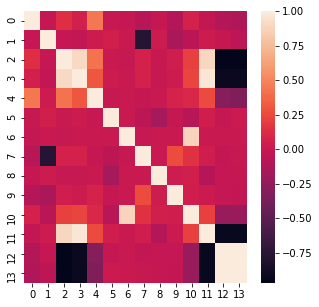

In [ ]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(arr, vmax = 1, square = False,xticklabels=df_cor.columns, yticklabels=df_cor.columns)
plt.show()

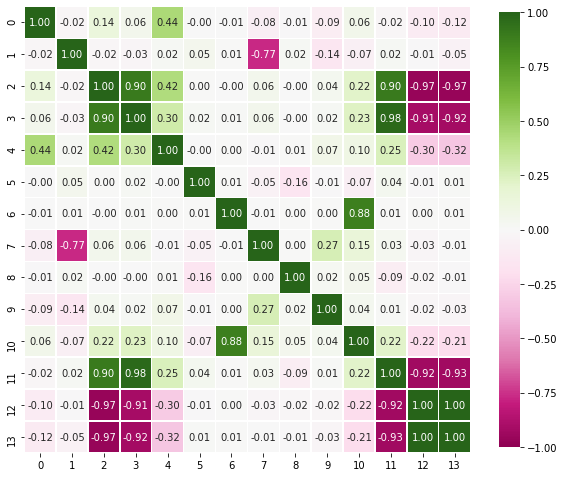

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(arr,vmin=-1.0, vmax=1.0,cmap="PiYG", center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": 0.80},xticklabels=df_cor.columns, yticklabels=df_cor.columns)
plt.show();